In [5]:
import numpy as np #Integrando una gaussiana
def f(x):
  return (1/(np.sqrt(2*np.pi)))*np.exp(-x**2/2)
def simpson_rule(a, b, n):
  h=(b-a)/n
  out=f(a)
  for i in range(1, n, 2):
    xi=a+i*h
    out+=4*f(xi)
  for i in range(2, n, 2):
   xi=a+i*h
   out+=2*f(xi)
  out+=f(b)
  return h*out/3

In [6]:
simpson_rule(0, 1, 1000)

np.float64(0.34134474606854576)

In [7]:
#Ahora para una integral elíptica
def f2(x,c):
    return (1/(np.sqrt(1-c**2*np.sin(x)**2)))
def k(n,c):
  a=0
  b=np.pi/2
  h=(b-a)/n
  out=f2(a,c)
  for i in range(1, n, 2):
    xi=a+i*h
    out+=4*f2(xi,c)
  for i in range(2, n, 2):
   xi=a+i*h
   out+=2*f2(xi,c)
  out+=f2(b,c)
  return h*out/3

In [8]:
k(1000, 0.1)

np.float64(1.574745561517357)

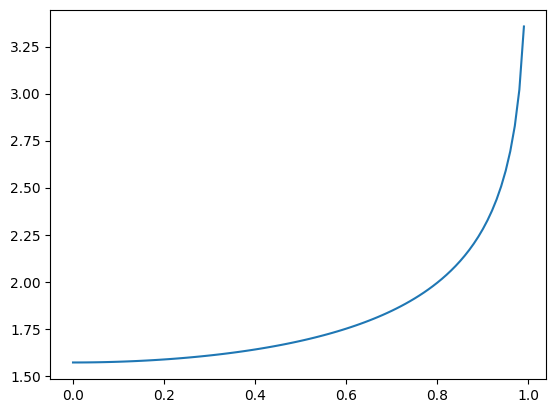

In [9]:
import numpy as np
import matplotlib.pyplot as plt
X=[]
Y=[]
x=0
while x<=1:
  X.append(x)
  Y.append(k(1000,x))
  x+=0.01
plt.plot(X, Y)

In [10]:
#Ahora veamos como se hace con SciPY
import scipy
scipy.special.gamma(1.5) #Por ejemplo, SciPY trabaja con funciones gamma

np.float64(0.8862269254527579)

In [11]:
# los argumentos se pasan de la siguiente manera quad(función, a, b)
scipy.integrate.quad(f, 0, 1)
#Imprime (valor de la integral, incertidumbre/error)

(0.341344746068543, 3.789687964201238e-15)

In [12]:
scipy.integrate.quad(f2, 0, np.pi/2, args=(0.1)) #Acá toma el parámetro c como un argumento, no como la variable de integración

(1.574745561517356, 1.7483187803228396e-14)

In [13]:
def k_scipy(x):
  return scipy.integrate.quad(f2, 0, np.pi/2, args=(x))[0] #El índice [0] para extraer solo el valor de la integral

In [14]:
k_scipy(0.1)

1.574745561517356